In [1]:
# %%
import ot
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import os
from experiment_utils import ng_experiment
# %matplotlib widget

In [2]:
data_path = "../Data/Neon-Clusters/"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='S1')
molecule_pairs

[['10-1', '10-2'],
 ['50-1', '50-2'],
 ['100-1', '100-2'],
 ['150-1', '150-2'],
 ['200-1', '200-2'],
 ['300-1', '300-2'],
 ['500-1', '500-2'],
 ['1000-1', '1000-2']]

In [4]:
otmol_res = ng_experiment(molecule_pairs, data_path, p_list=range(2,9), method = 'sinkhorn')

10-1 10-2 sinkhorn 0.32 0.02s
50-1 50-2 sinkhorn 0.31 1.20s
100-1 100-2 sinkhorn 0.21 4.02s
150-1 150-2 sinkhorn 0.19 4.21s
200-1 200-2 sinkhorn 0.38 4.87s
300-1 300-2 sinkhorn 0.12 7.09s
500-1 500-2 sinkhorn 0.11 13.83s
1000-1 1000-2 sinkhorn 0.25 44.21s


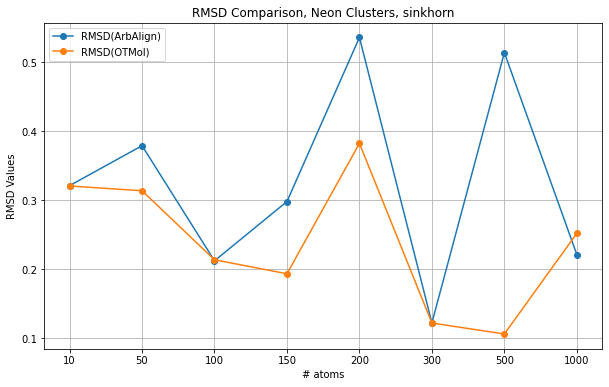

In [5]:
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+').rename(columns={'RMSD(KM-ByAtomName)': 'RMSD(ArbAlign)'})
combined_df = pd.concat([arbalign_res, otmol_res], axis=1)
columns_to_plot = ["RMSD(ArbAlign)", "RMSD(OTMol)"]
plt.figure(figsize=(10,6))
for column in columns_to_plot:
    plt.plot(range(len(combined_df)), combined_df[column], marker='o', label=column)
plt.title("RMSD Comparison, Neon Clusters, sinkhorn")
plt.xlabel("# atoms")
plt.ylabel("RMSD Values")
#plt.ylim(0.5, 3)
plt.xticks(range(len(combined_df)), combined_df['# atoms'])
plt.legend()
plt.grid(True)